In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape data for an MLP input
import numpy as np

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert labels to a one-hot vector ( categorical to numerical or numerical to categorical)
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

MLP = Sequential()
MLP.add(InputLayer(input_shape=(784, ))) # input layer
MLP.add(Dense(256, activation='relu')) # hidden layer 1
MLP.add(Dense(256, activation='relu')) # hidden layer 2
MLP.add(Dense(10, activation='softmax')) # output layer

# summary
MLP.summary()

c:\Users\csit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# optimization
MLP.compile(loss='categorical_crossentropy',
            optimizer='adam', #adaptive moment estimation
            metrics=['accuracy'])

In [42]:
MLP.fit(train_images, train_labels, 
        epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9258 - loss: 0.2589
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0965
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0604
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0412
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0296
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0263
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0220
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0159
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0161
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0145
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0108
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [43]:
test_loss, test_acc = MLP.evaluate(test_images, test_labels,
                                   batch_size=128,
                                   verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.102527916431427
Test accuracy: 0.9794999957084656


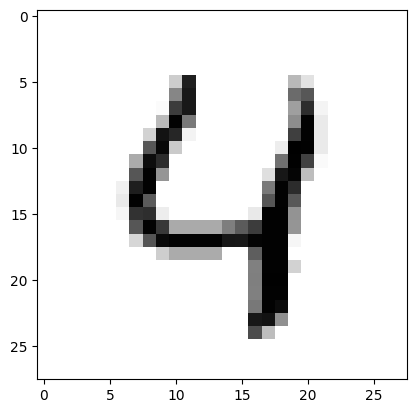

[[0.06270621 0.02898541 0.11579678 0.03593339 0.02923076 0.35460865
  0.12606454 0.05851492 0.16448152 0.02367784]]


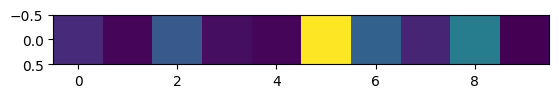

In [50]:
import matplotlib.pyplot as plt
digit = test_images[4]

# Plot the original image (assumed to be 28x28)
plt.imshow(digit.reshape(28, 28), cmap="binary")
plt.show()

# Prepare the image for prediction
digit = np.reshape(digit, (1, 784))
digit = digit.astype('float32') / 255

# Make prediction
prediction = MLP.predict(digit, verbose=0)
print(prediction)
plt.imshow(prediction)